In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()
train.groupby('Attrition').mean()

,ID,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,YearsAtCompany
Attrition,,,,,,,,,,,,,,,,,,,,,
0,608.543078,37.428295,802.556202,8.965150,66.158915,2.764535,2.151985,2.771539,6867.586641,14397.109496,...,1.0,1195.337851,2.776163,2.784884,4.417231,2.210271,4.319458,0.0,12.965116,7.323330
1,651.979695,33.482234,746.324873,10.634518,65.331633,2.573604,1.639594,2.408163,4792.888325,14347.852792,...,1.0,1182.517766,2.446701,2.670051,2.883249,1.969543,2.817259,0.0,12.167513,5.045685


In [3]:
train = train.dropna()

In [4]:
train.shape

(1213, 44)

In [5]:
train.MonthlyIncome

0       10482
1        4000
2       14118
3        8633
4        2472
        ...  
1225     3339
1226    13570
1227     6134
1228     2819
1229     5617
Name: MonthlyIncome, Length: 1213, dtype: int64

In [6]:
test.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           1
CommunicationSkill          0
Behaviour                   0
Experience                  1
LvlGrownInOrg               0
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            1
TotalWorkingYears           0
TrainingTimesLastYear       0
Education                   0
EducationField              0
EmployeeCo

In [7]:
test['PerformanceRating'].median()   
test['PerformanceRating'] = test['PerformanceRating'].replace(np.nan, test['PerformanceRating'].mean())
test['Experience'].mean()   
test['Experience'] = test['Experience'].replace(np.nan, test['Experience'].mean())
test['StockOptionLevel'].mean()   
test['StockOptionLevel'] = test['StockOptionLevel'].replace(np.nan, test['StockOptionLevel'].mean())
test['JobInvolvement'].mean()   
test['JobInvolvement'] = test['JobInvolvement'].replace(np.nan, test['JobInvolvement'].mean())
test['ProjectsContributed'].mean()   
test['ProjectsContributed'] = test['ProjectsContributed'].replace(np.nan, test['ProjectsContributed'].mean())

In [8]:
train.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               0
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Education                   0
EducationField              0
EmployeeCo

In [9]:
ttrain=train.drop(['Attrition','YearsAtCompany'],axis=1)
all_data = pd.concat((ttrain.loc[:,'Age':],
                      test.loc[:,'Age':]))
# all_data(['FormalWarnings','YearsInCurrentRole'])
all_data = pd.get_dummies(all_data)

In [10]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=19, encode='ordinal', strategy='uniform')
X=np.array(all_data['MonthlyIncome'])
X=X.reshape(-1,1)
est.fit(X)
all_data['MonthlyIncome'] = est.transform(X)
all_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,44.0,1376.0,1,91.0,2.0,3,1.0,9.0,2326.0,9.0,...,0,1,1,0,0,0,0,1,0,0
1,25.0,675.0,5,85.0,4.0,2,1.0,2.0,18384.0,1.0,...,0,1,1,0,0,1,0,0,0,0
2,57.0,210.0,29,56.0,2.0,4,4.0,13.0,22102.0,3.0,...,0,1,1,0,0,0,1,0,0,0
3,47.0,1180.0,25,84.0,3.0,3,3.0,7.0,13084.0,2.0,...,1,1,1,0,0,0,0,1,0,0
4,22.0,391.0,7,75.0,3.0,1,2.0,1.0,26092.0,1.0,...,1,1,0,1,0,1,0,0,0,0


In [11]:
all_data

,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,44.0,1376.0,1,91.0,2.0,3,1.0,9.0,2326.0,9.0,...,0,1,1,0,0,0,0,1,0,0
1,25.0,675.0,5,85.0,4.0,2,1.0,2.0,18384.0,1.0,...,0,1,1,0,0,1,0,0,0,0
2,57.0,210.0,29,56.0,2.0,4,4.0,13.0,22102.0,3.0,...,0,1,1,0,0,0,1,0,0,0
3,47.0,1180.0,25,84.0,3.0,3,3.0,7.0,13084.0,2.0,...,1,1,1,0,0,0,0,1,0,0
4,22.0,391.0,7,75.0,3.0,1,2.0,1.0,26092.0,1.0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,59.0,1324.0,3,81.0,4.0,1,1.0,1.0,9964.0,4.0,...,0,1,0,1,0,0,0,1,0,0
236,37.0,1189.0,3,87.0,3.0,3,4.0,6.0,14506.0,2.0,...,1,1,1,0,0,1,0,0,0,0
237,37.0,1040.0,2,100.0,2.0,2,4.0,4.0,15850.0,5.0,...,0,1,1,0,0,1,0,0,0,0
238,44.0,489.0,23,67.0,3.0,2,2.0,1.0,25043.0,4.0,...,0,1,1,0,0,0,0,1,0,0


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [13]:
ttrain = all_data[:train.shape[0]]
ttest = all_data[train.shape[0]:]
y = train.YearsAtCompany
y

0       20
1        6
2        1
3       17
4        1
        ..
1225     7
1226    20
1227     2
1228     3
1229    10
Name: YearsAtCompany, Length: 1213, dtype: int64

In [14]:
ttest.isnull().sum()

Age                                0
DailyRate                          0
DistanceFromHome                   0
HourlyRate                         0
JobInvolvement                     0
                                  ..
EducationField_Life Sciences       0
EducationField_Marketing           0
EducationField_Medical             0
EducationField_Other               0
EducationField_Technical Degree    0
Length: 62, dtype: int64

In [15]:
ttrain = ttrain.astype(int)
ttest.fillna(ttest.median(), inplace=True)
ttest = ttest.astype(int)

C:\Users\Khushi makhijani\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_rescaled = scaler.fit_transform(ttrain)
test_rescaled = scaler.fit_transform(ttest)
from sklearn.decomposition import PCA

pca = PCA(n_components= 22)
X_train = pca.fit_transform(train_rescaled)
X_test = pca.transform(test_rescaled)

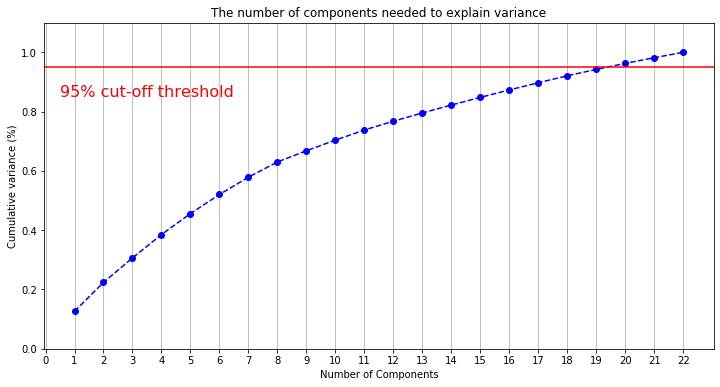

In [17]:
# train_rescaled = scaler.fit_transform(ttrain)
# test_rescaled = scaler.fit_transform(ttest)
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 23, step=1)
Y  = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, Y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 23, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [18]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledRandom', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, ttrain, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -94029777234803425280.000000 (282089331704410275840.000000)


C:\Users\Khushi makhijani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khushi makhijani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khushi makhijani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khushi makhijani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khushi makhijani\Anacon

ScaledRandom: -3.183464 (1.104546)
ScaledKNN: -16.871808 (3.269155)
ScaledCART: -5.743449 (1.521666)
ScaledGBM: -3.123217 (1.126406)


In [19]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500,1000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 1000]}

In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(ttrain, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [21]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [22]:
rf = RandomForestRegressor(n_estimators = 800,min_samples_split = 5,min_samples_leaf=1,max_features= 'sqrt',max_depth=90,bootstrap=False)
rf.fit(ttrain, y)
predictions = rf.predict(ttest)

In [24]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

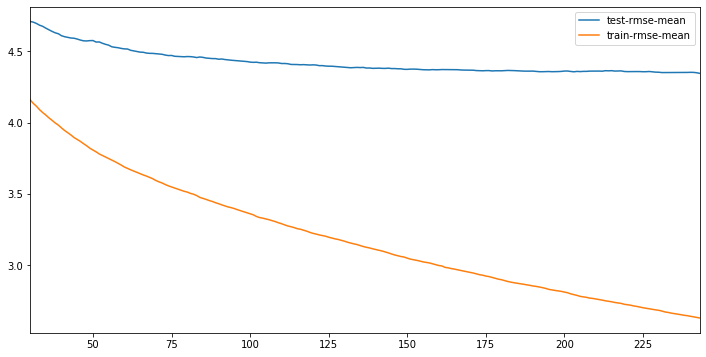

In [25]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [26]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv  n_estimators=360, max_depth=2, learning_rate=0.1
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
preds = (predictions + xgb_preds)/2


In [28]:
solution = pd.DataFrame({"ID":test.ID, "YearsAtCompany":preds})
solution.to_csv("output2.csv", index = False)